In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

sns.set_theme(context = "notebook", style = "darkgrid")


# Using DBSCAN

## A simple Geographical Application

### Reading our Data

In [2]:
url = "https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/nypd_murder_locations.csv"
tb_murder = pd.read_csv(url, parse_dates=["CMPLNT_FR_DT"])
tb_murder.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CMPLNT_NUM         261 non-null    int64         
 1   CMPLNT_FR_DT       261 non-null    datetime64[ns]
 2   LOC_OF_OCCUR_DESC  261 non-null    object        
 3   BORO_NM            261 non-null    object        
 4   ADDR_PCT_CD        261 non-null    float64       
 5   LAT                261 non-null    float64       
 6   LONG               261 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 14.4+ KB


In [4]:
tb_murder.head()

,CMPLNT_NUM,CMPLNT_FR_DT,LOC_OF_OCCUR_DESC,BORO_NM,ADDR_PCT_CD,LAT,LONG
0,255442126,2016-09-30,INSIDE,MANHATTAN,9.0,40.720450,-73.974914
1,365143806,2016-09-29,OUTSIDE,BROOKLYN,68.0,40.638668,-74.022463
2,655600478,2016-09-28,INSIDE,QUEENS,104.0,40.708228,-73.912862
3,154313364,2016-09-28,INSIDE,BROOKLYN,79.0,40.693141,-73.945860
4,225854780,2016-09-27,OUTSIDE,BRONX,46.0,40.852382,-73.913516


(40.50960629515, 40.90712248785, -74.25538294274999, -73.70293030025)

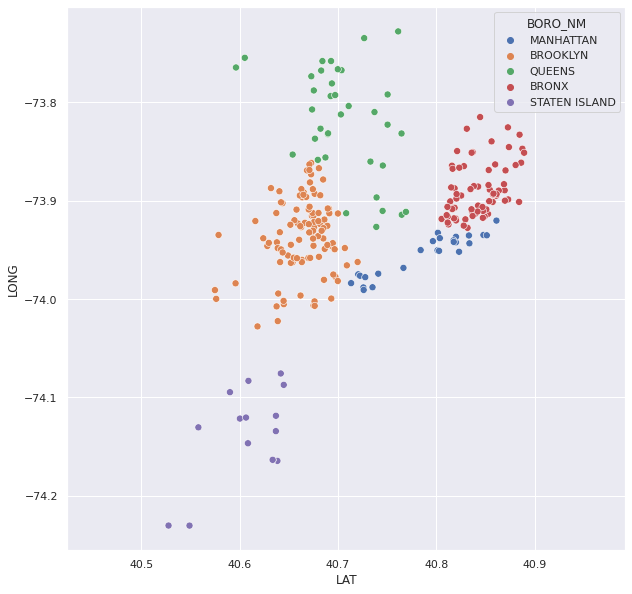

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT", y="LONG", 
    hue="BORO_NM", s = 50
)
plt.axis("equal")

### Data Transformation

In [8]:
tb_murder["LAT_DEMEAN"] = tb_murder["LAT"] - tb_murder["LAT"].mean()
tb_murder["LONG_DEMEAN"] = tb_murder["LONG"] - tb_murder["LONG"].mean()
tb_murder["LAT_DIST"] = tb_murder["LAT_DEMEAN"] * 113819
tb_murder["LONG_DIST"] = tb_murder["LONG_DEMEAN"] * 113819

(-24778.683637962375,
 20466.211898958867,
 -38025.77587019969,
 24853.831446507214)

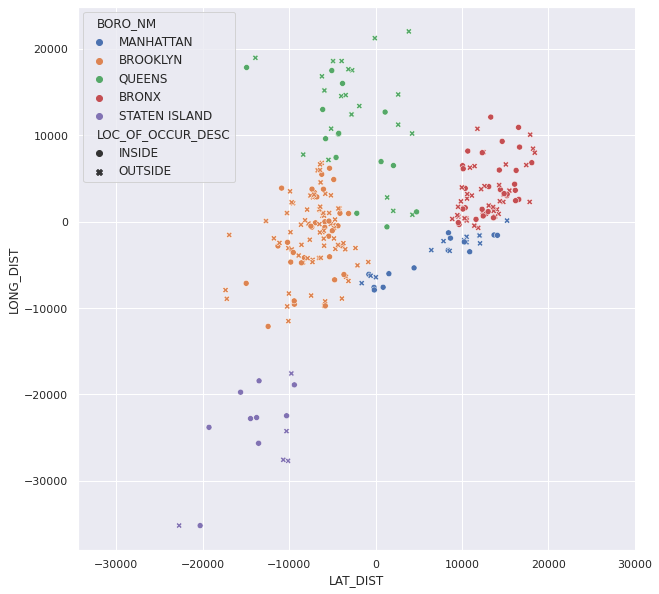

In [9]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT_DIST", y="LONG_DIST", 
    hue="BORO_NM", style="LOC_OF_OCCUR_DESC"
)
plt.axis("equal")

### Fitting the DBSCAN Algorithm

In [10]:
from sklearn.cluster import DBSCAN

In [12]:
5/tb_murder.shape[0]

0.019157088122605363

In [19]:
db_fit = DBSCAN(eps = 2000, min_samples = 5)

In [20]:
db_fit.fit(tb_murder[["LAT_DIST", "LONG_DIST"]])

DBSCAN(eps=2000)

In [21]:
tb_murder["db_label"] = [str(x) for x in db_fit.labels_]

In [22]:
tb_murder["db_label"].value_counts()

1     91
2     72
-1    53
0     14
3      9
4      7
7      5
6      5
5      5
Name: db_label, dtype: int64

### Visualizing Results

(-24778.683637962375,
 20466.211898958867,
 -38025.77587019969,
 24853.831446507214)

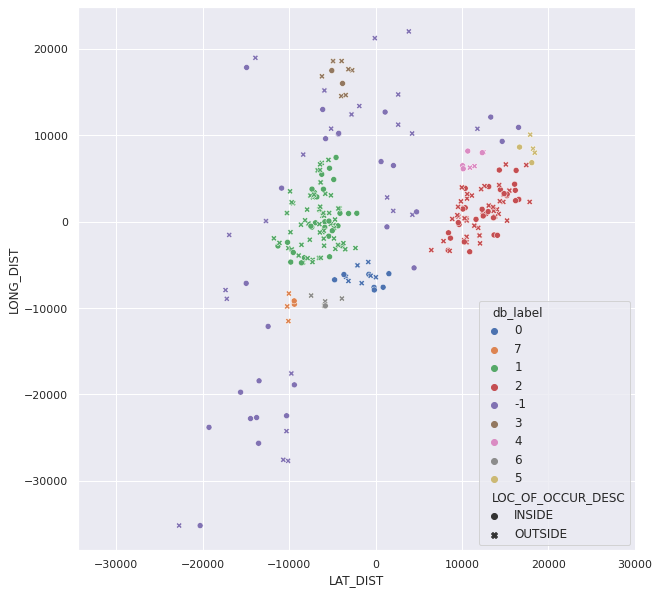

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", style="LOC_OF_OCCUR_DESC"
)
plt.axis("equal")

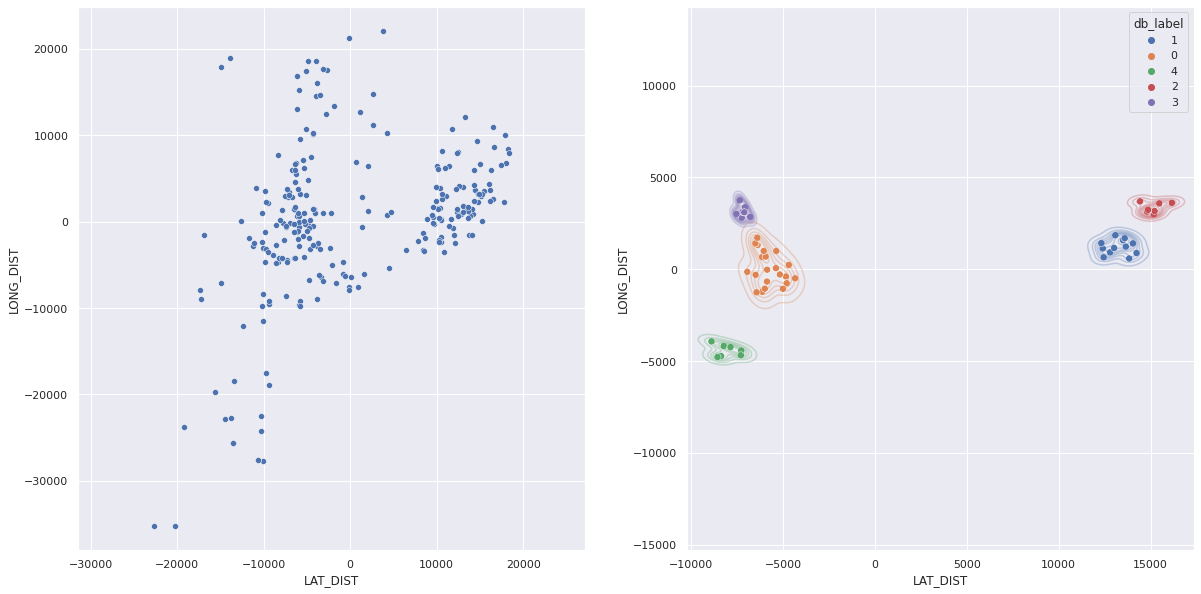

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [35]:
db_fit = DBSCAN(eps = 750, min_samples = 5)
db_fit.fit(tb_murder[["LAT_DIST", "LONG_DIST"]])
tb_murder["db_label"] = [str(x) for x in db_fit.labels_]

fig, ax = plt.subplots(1,2, figsize = (20, 10))

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT_DIST", y="LONG_DIST",
    ax = ax[0]
)
ax[0].axis("equal")
plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", alpha = 0.3,
    ax = ax[1]
)
sns.scatterplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", s = 50,
    ax = ax[1]
)
ax[1].axis("equal");

#### Removing outliers

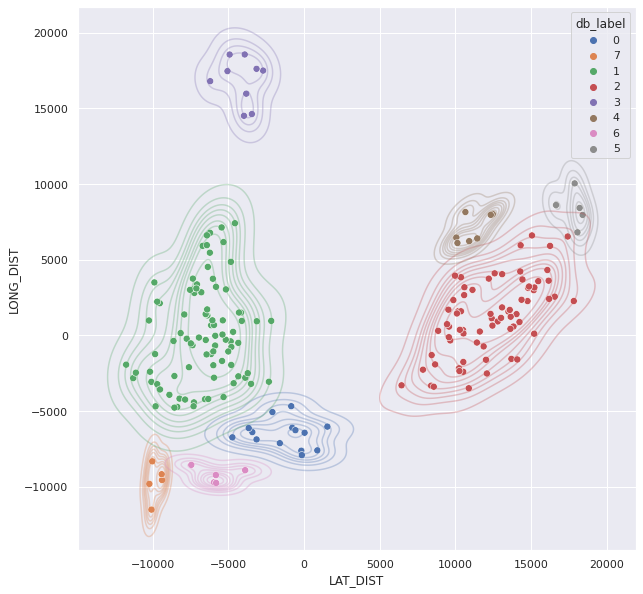

In [24]:
plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", alpha = 0.3
)
sns.scatterplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", s = 50
)
plt.axis("equal");

In [ ]:
#10h07
#12h07

## Patterns in Electricity Usage

In [37]:
url = "https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_household_electricity.csv"
tb_house = pd.read_csv(url, parse_dates = ['date_time'])
tb_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   global_active_power    10000 non-null  float64       
 1   global_reactive_power  10000 non-null  float64       
 2   voltage                10000 non-null  float64       
 3   global_intensity       10000 non-null  float64       
 4   sub_metering_1         10000 non-null  float64       
 5   sub_metering_2         10000 non-null  float64       
 6   sub_metering_3         10000 non-null  float64       
 7   date_time              10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 625.1 KB


In [38]:
clu_vars = ['sub_metering_1', 'sub_metering_2', 'sub_metering_3', 'voltage', 'global_intensity']

In [39]:
tb_house[clu_vars].describe()

,sub_metering_1,sub_metering_2,sub_metering_3,voltage,global_intensity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.163300,1.259200,6.474300,240.839232,4.636100
std,6.245937,5.555565,8.428502,3.265102,4.474615
min,0.000000,0.000000,0.000000,226.250000,0.200000
25%,0.000000,0.000000,0.000000,238.980000,1.400000
50%,0.000000,0.000000,1.000000,241.020000,2.600000
75%,0.000000,1.000000,17.000000,242.900000,6.400000
max,75.000000,76.000000,31.000000,252.140000,35.200000


In [40]:
scaler = StandardScaler()
scaler.fit(tb_house[clu_vars])
tb_sca_cp = scaler.transform(tb_house[clu_vars])

In [41]:
tb_sca_cp

array([[-0.18625838, -0.22666695,  1.24888462, -1.50055879,  1.10940221],
       [-0.0261463 ,  6.61366352,  1.24888462, -0.82979575,  2.85265595],
       [-0.18625838,  0.13335044,  1.3675356 ,  0.0461779 ,  0.30482356],
       ...,
       [-0.18625838, -0.04665825,  1.48618658,  0.01248661,  0.30482356],
       [ 4.61710389,  0.13335044,  2.79134736, -1.55875285,  3.12084883],
       [-0.18625838, -0.22666695,  1.48618658,  1.19474475,  0.34952237]])

### Finding `eps` e `min_samples`

In [42]:
from sklearn.neighbors import NearestNeighbors

In [43]:
neighbors = int(len(clu_vars) * 2)
neighbors

10

In [119]:
neighbors = 20

In [120]:
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(tb_sca_cp)

NearestNeighbors(n_neighbors=20)

In [121]:
distances, indices = nbrs.kneighbors(tb_sca_cp)

tb_distances = pd.DataFrame(distances)
tb_distances.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.030628,0.059861,0.098011,0.161721,0.182596,0.186710,0.188008,0.214779,0.220263,0.224018,0.231477,0.235382,0.236308,0.253413,0.260826,0.263625,0.268263,0.268813,0.271082
1,0.0,0.240528,0.311200,0.399035,0.402121,0.425012,0.431458,0.446790,0.493867,0.548123,0.569549,0.572507,0.600051,0.604275,0.642729,0.647530,0.728432,0.732051,0.739419,0.743928
2,0.0,0.049575,0.067383,0.089869,0.095536,0.113324,0.119451,0.125154,0.135800,0.139508,0.142770,0.147811,0.154624,0.162148,0.167611,0.171519,0.179707,0.180243,0.180425,0.184116
3,0.0,0.000000,0.000000,0.003063,0.003063,0.003063,0.018377,0.030628,0.030628,0.033691,0.044699,0.044699,0.045633,0.047249,0.048329,0.050974,0.052515,0.054186,0.057869,0.061257
4,0.0,0.006126,0.012251,0.033691,0.039817,0.044804,0.045943,0.049575,0.050974,0.052515,0.052515,0.055131,0.059861,0.068623,0.070975,0.073379,0.076571,0.078326,0.083430,0.089398


In [122]:
tb_distances.shape

(10000, 20)

Let's take a look at the `distances` array:

In [123]:
tb_distances.columns = ["N_" + str(i) for i in range(neighbors)]
tb_distances.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19
0,0.0,0.030628,0.059861,0.098011,0.161721,0.182596,0.186710,0.188008,0.214779,0.220263,0.224018,0.231477,0.235382,0.236308,0.253413,0.260826,0.263625,0.268263,0.268813,0.271082
1,0.0,0.240528,0.311200,0.399035,0.402121,0.425012,0.431458,0.446790,0.493867,0.548123,0.569549,0.572507,0.600051,0.604275,0.642729,0.647530,0.728432,0.732051,0.739419,0.743928
2,0.0,0.049575,0.067383,0.089869,0.095536,0.113324,0.119451,0.125154,0.135800,0.139508,0.142770,0.147811,0.154624,0.162148,0.167611,0.171519,0.179707,0.180243,0.180425,0.184116
3,0.0,0.000000,0.000000,0.003063,0.003063,0.003063,0.018377,0.030628,0.030628,0.033691,0.044699,0.044699,0.045633,0.047249,0.048329,0.050974,0.052515,0.054186,0.057869,0.061257
4,0.0,0.006126,0.012251,0.033691,0.039817,0.044804,0.045943,0.049575,0.050974,0.052515,0.052515,0.055131,0.059861,0.068623,0.070975,0.073379,0.076571,0.078326,0.083430,0.089398


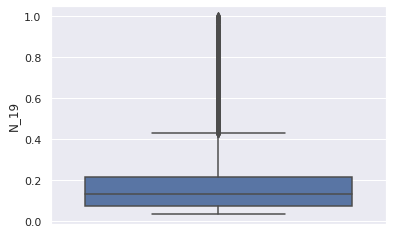

In [134]:
sns.boxplot(data = tb_distances[tb_distances['N_19'] < 1], y = 'N_19')

In [125]:
np.quantile(tb_distances['N_9'], 0.99)

1.5095503701486692

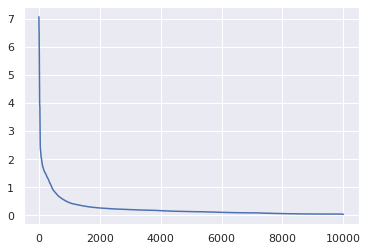

In [126]:
distance_desc = sorted(distances[:,-1], reverse=True)
plt.plot(distance_desc)

In [127]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We are going to use the `kneed` library to find the optimal *knee* in our distance curve:

In [128]:
from kneed import KneeLocator

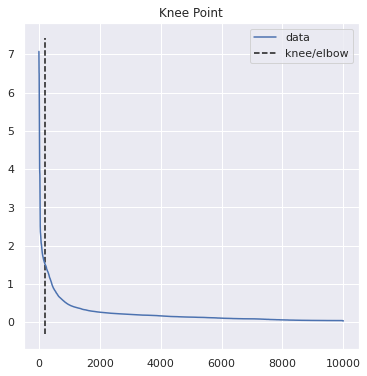

In [129]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=2,
                      curve="convex",
                      direction="decreasing")
kneedle.plot_knee();


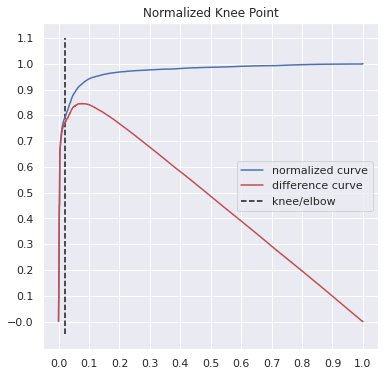

In [130]:
kneedle.plot_knee_normalized();

In [147]:
kneedle.knee_y

1.5112861539082623

In [132]:
print(f"Optimal Knee found at eps = {np.round(kneedle.knee_y, 2)}\nwith min_samples = {neighbors}")

Optimal Knee found at eps = 1.51
with min_samples = 20


### Fitting DBScan

In [136]:
db_fit = DBSCAN(eps = 1.2, min_samples = 20)
db_fit.fit(tb_sca_cp)
tb_house['labels'] = [str(x) for x in db_fit.labels_]
tb_house['labels'].value_counts()

0     9424
-1     171
2      148
1      122
3       76
4       32
5       27
Name: labels, dtype: int64

In [98]:
tb_house

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,date_time,labels,hour
0,2.268,0.000,235.94,9.6,0.0,0.0,17.0,2008-01-23 21:14:00,0,21
1,4.152,0.354,238.13,17.4,1.0,38.0,17.0,2008-02-02 16:42:00,1,16
2,1.448,0.212,240.99,6.0,0.0,2.0,18.0,2008-03-21 11:29:00,0,11
3,0.284,0.072,237.66,1.2,0.0,0.0,0.0,2008-02-28 10:13:00,0,10
4,0.452,0.084,239.81,1.8,0.0,0.0,0.0,2007-03-07 20:10:00,0,20
...,...,...,...,...,...,...,...,...,...,...
9995,0.430,0.208,244.94,1.8,0.0,0.0,1.0,2010-10-26 20:08:00,0,20
9996,1.816,0.074,239.16,7.6,0.0,0.0,17.0,2008-01-23 09:05:00,0,9
9997,1.440,0.054,240.88,6.0,0.0,1.0,19.0,2010-10-11 15:25:00,0,15
9998,4.286,0.426,235.75,18.6,30.0,2.0,30.0,2008-08-31 19:05:00,-1,19


In [137]:
tb_house['hour'] = tb_house['date_time'].dt.hour

In [138]:
tb_hourly_cluster = pd.crosstab(tb_house['hour'], tb_house['labels']).reset_index()

In [139]:
tb_hourly_cluster

labels,hour,-1,0,1,2,3,4,5
0,0,2,452,1,1,2,2,0
1,1,1,391,0,2,1,1,0
2,2,0,390,0,1,0,0,0
3,3,0,414,0,1,1,0,0
4,4,0,415,0,0,1,0,0
5,5,0,415,0,0,0,0,0
6,6,1,401,0,1,0,0,0
7,7,1,434,5,2,1,0,0
8,8,5,407,6,15,0,1,0
9,9,6,377,8,14,1,0,1


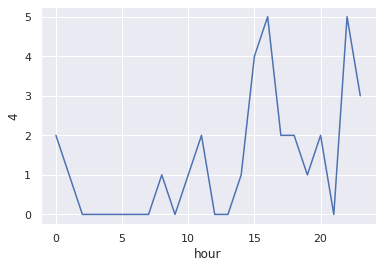

In [140]:
sns.lineplot(data = tb_hourly_cluster, x = 'hour', y = '4')

In [99]:
tb_house.columns

Index(['global_active_power', 'global_reactive_power', 'voltage',
       'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3', 'date_time', 'labels', 'hour'],
      dtype='object')

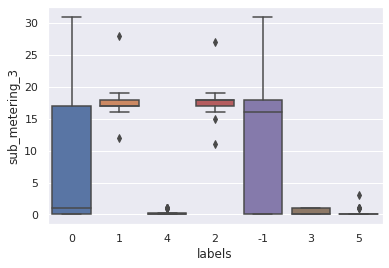

In [145]:
sns.boxplot(data = tb_house, x= 'labels', y = 'sub_metering_3')